# Heatmap Visualisation troubleshooting
###  COVIRT19 microbial subgroup seqscreen analysis 
#### Date : 23 DEC 2020 
#### Maintained by :
    Jochum, Michael D. 
    Baylor College of Medicine 
    michael.jochum@bcm.edu

#### Mike, thank you for walking me through this pheatmap stuff I actually found a couple bugs in the code that made it through.
- Remember how you were asking why the dmm cluster annotations on the left hand side of the map werent identical?  It was because I never subsetted the annotation row to match the terms, and I think it was just  

In [1562]:
library(phyloseq)
library(microbiome)
library(tidyverse)
library(dplyr)
library(tidyr)
library(scales)
library(RColorBrewer)
library(ggsci)
library(viridis)
library(pheatmap)
library(MatrixGenerics)
library(FactoMineR)
library(factoextra)

In [1563]:
setwd("/media/jochum00/Aagaard_Raid3/jupyter_notebooks/jochum00_jupyter/microbial/GO_term_analysis/16_DEC_2020_dmm_troubleshooting_Lee/")
getwd()

[1] "/media/jochum00/Aagaard_Raid3/jupyter_notebooks/jochum00_jupyter/microbial/GO_term_analysis/16_DEC_2020_dmm_troubleshooting_Lee"

In [1568]:
load(file = "./images/2_maaslin2.rda")

compositionally transform both datasets

In [1587]:
term_pseq_prune_comp2<-microbiome::transform(transform = "compositional",term_pseq_no_neg_gonames)
term_pseq_prune_comp<-microbiome::transform(transform = "compositional",term_pseq_prune)

### TEMP CODE FOR ONLY LOOKING AT COVID19 SAMPLES

In [1588]:
term_pseq_prune_comp2<-subset_samples(physeq = term_pseq_prune_comp2, case=="COVID19")
term_pseq_prune_comp<-subset_samples(physeq = term_pseq_prune_comp, case=="COVID19")

### REMOVE THE PREVIOUS LINE OF CODE  WHEN YOU ARE DONE

In [1589]:
#prune out the masslin2 GO Terms and fix the names for the big dataset
term_pseq_prune_comp2 <- prune_taxa(taxa = Terms$Term,x =term_pseq_prune_comp2)
tax<-data.frame(tax_table(term_pseq_prune_comp2))
names<-paste(rownames(tax),tax$name,sep="-")
taxa_names(term_pseq_prune_comp2)<-names

In [1590]:
#order the count tables by the rowMeans
count<-abundances(term_pseq_prune_comp)
select <- order(rowMeans(count),decreasing=TRUE)
select2<-(count)[select,]
tmp<-rownames(select2)
select2<-as_tibble(select2, rownames=NA)

countb<-abundances(term_pseq_prune_comp2)
selectb <- order(rowMeans(countb),decreasing=TRUE)
select2b<-(countb)[select,]
tmpb<-rownames(select2b)
select2b<-as_tibble(select2b, rownames=NA)
head(colnames(select2))

[1] "CRR125941"   "CRR125949"   "SRR11092059" "SRR11092060" "SRR11092061"
[6] "SRR11092062"

In [1591]:
#make an annotation dataset for the colum headers

sam<-data.frame(sample_data(term_pseq_prune_comp))
df<-as.data.frame(sample_data(term_pseq_prune_comp))
df<-as_tibble(df, rownames = NA)
df<-df%>%select(publication, dmn,case,outcome)
df<-as.data.frame(df)
row.names(df) <- colnames(select2)
colnames(df)<-c("Publication","dmm_cluster", "Case","Outcome")
df$dmm_cluster<-as.character(df$dmm_cluster)

sam<-data.frame(sample_data(term_pseq_prune_comp2))
dfb<-as.data.frame(sample_data(term_pseq_prune_comp2))
dfb<-as_tibble(dfb, rownames = NA)
dfb<-dfb%>%select(publication,dmn, case,outcome)
dfb<-as.data.frame(dfb)
row.names(dfb) <- colnames(select2b)
colnames(dfb)<-c("Publication","dmm_cluster", "Case","Outcome")
dfb$dmm_cluster<-as.character(dfb$dmm_cluster)

Warning message in class(x) <- c(setdiff(subclass, tibble_class), tibble_class):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”
Warning message in class(x) <- c(setdiff(subclass, tibble_class), tibble_class):
“Setting class(x) to multiple strings ("tbl_df", "tbl", ...); result will no longer be an S4 object”


In [1592]:
#make the annotation rows

df_row<-as.data.frame(fitted(best))
colnames(df_row)<-c("1","2","3")

make the associated color pallete for the column and row headers

In [1593]:
ann_colors = list(
    Publication=c("Xiong"="#008B45FF", "Shen"="#3B4992FF","Chen"='#631879FF',"Wu"="#008280FF","Zhou"='#BB0021FF',"Ren"='grey75'),
    dmm_cluster=c("1"="forestgreen","2"="firebrick","3"="darkorange1"),
    Case=c("COVID19"="firebrick","Community_acquired_pneumonia"="darkorange1", "Control_Healthy"="forestgreen"),
    Outcome=c("Deceased"="black","Stabilized"="goldenrod1","Recovered"="forestgreen"))

## heat map Ex 1:
 - compositional transformation before and after subessting for Maaslin2 GO Terms
 - No distance claustering
 - No color z score scaling
 
 #### Side note, I changed the total colors used int the RdYlBu pallete from 1000 to 10 in order to make the diferences more noticeable

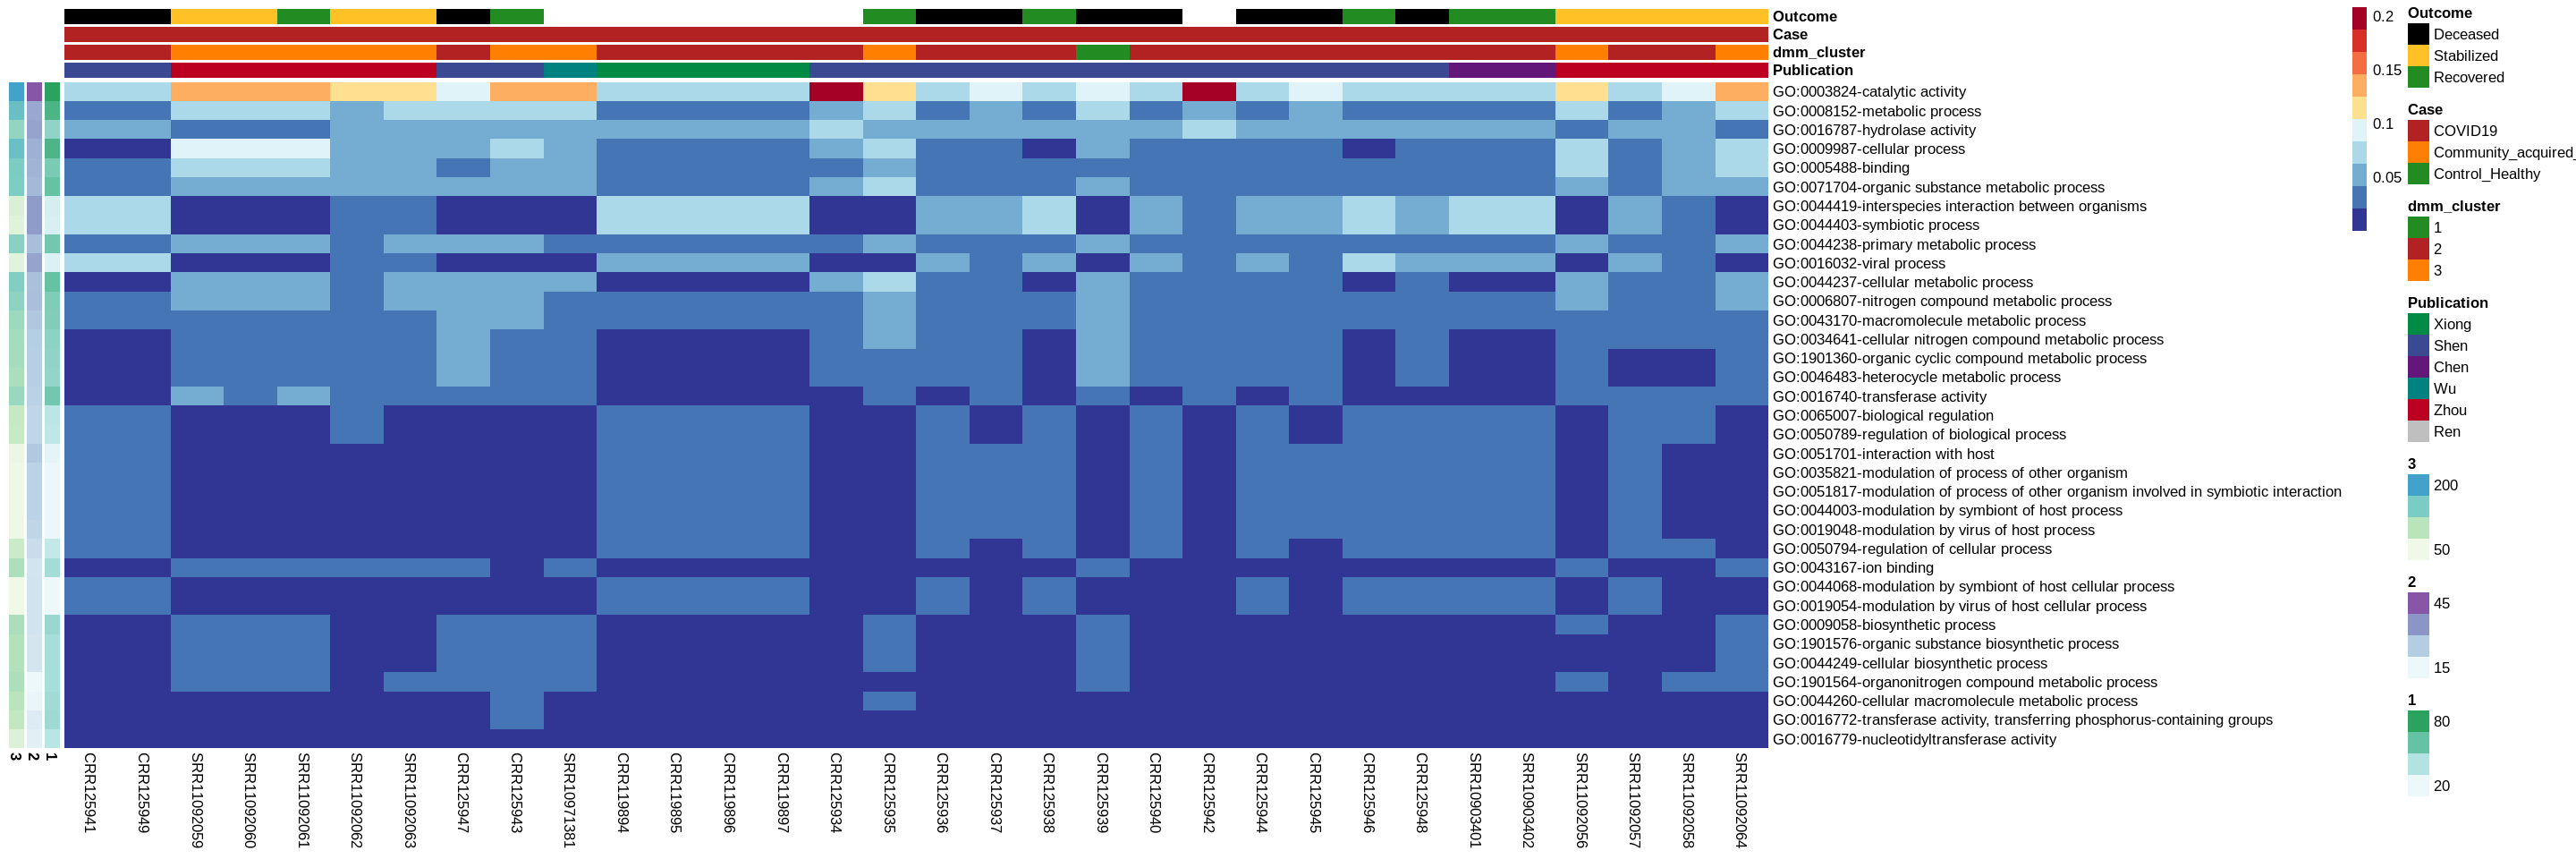

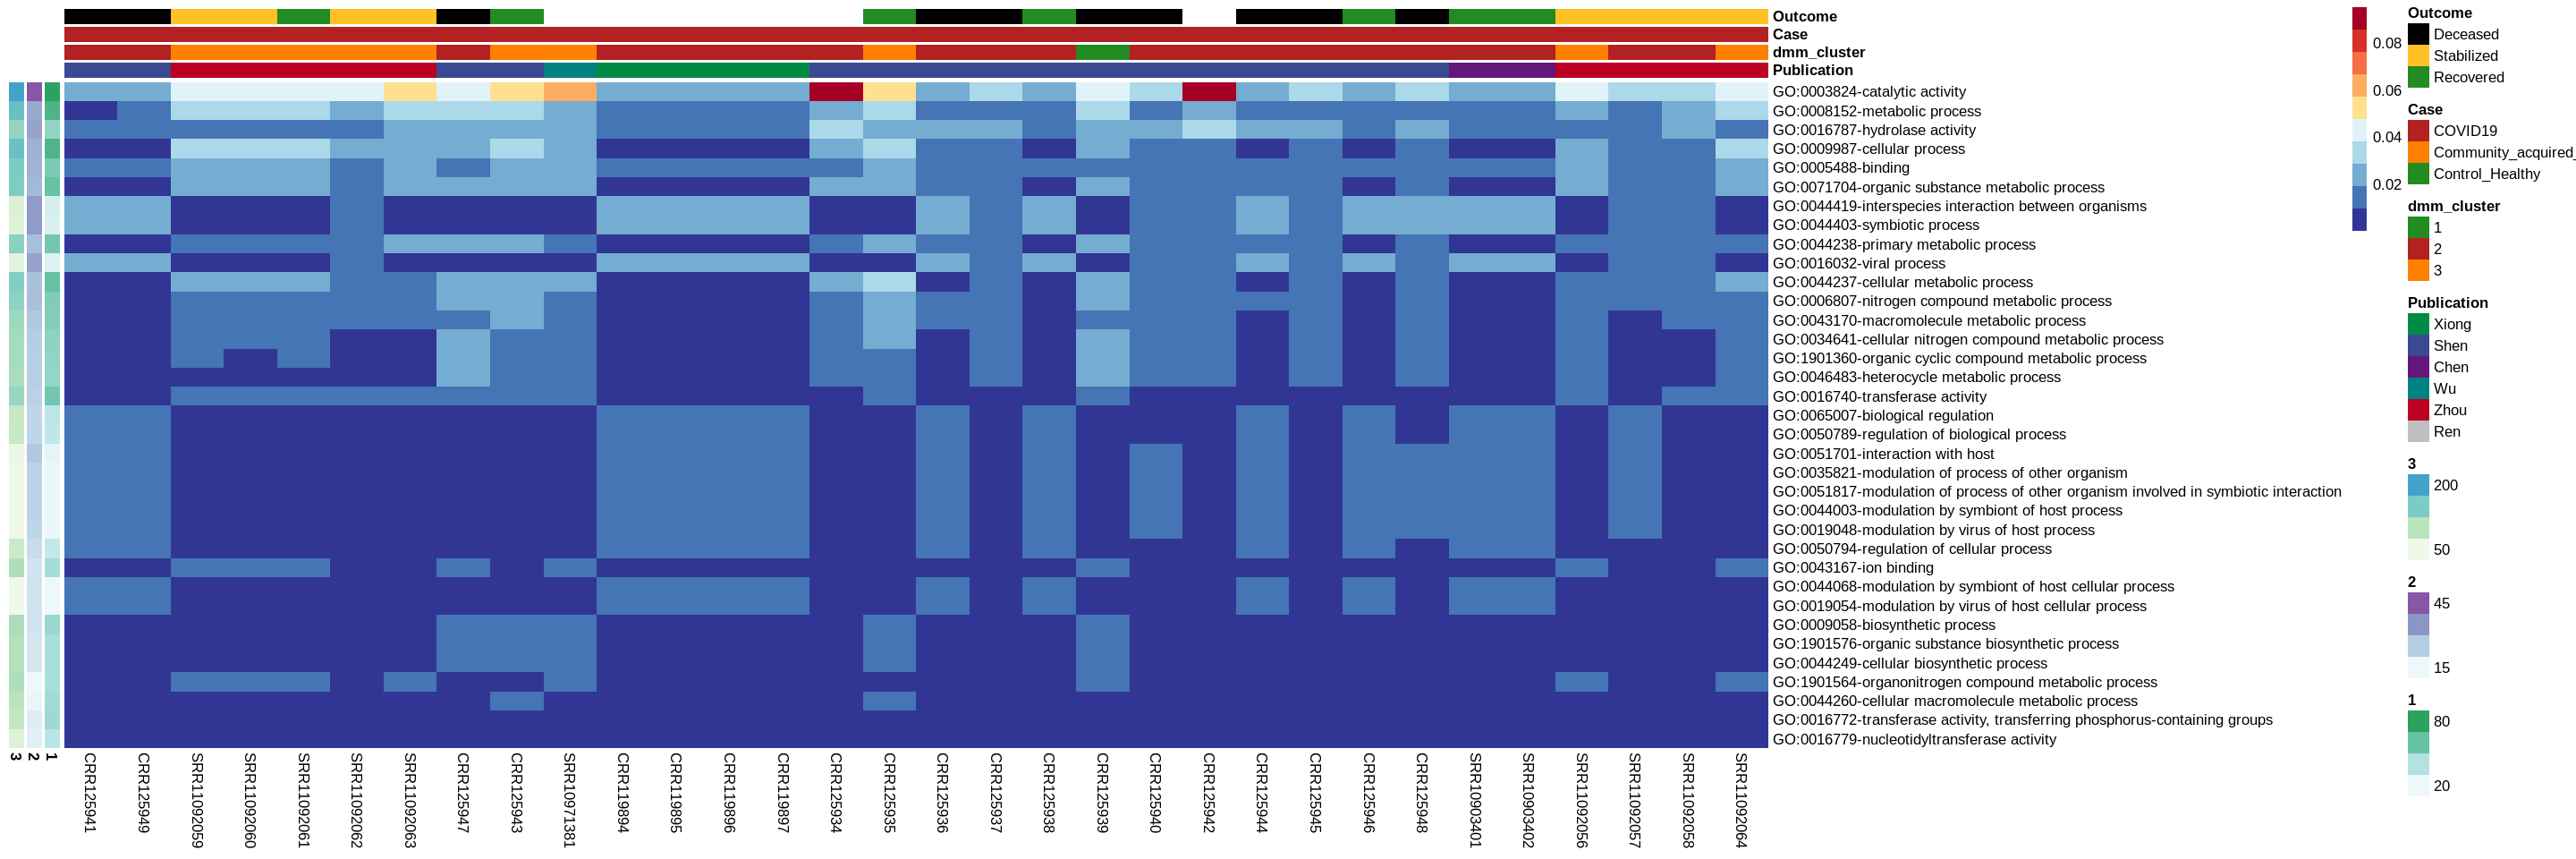

In [1594]:
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               annotation_colors = ann_colors,
               cluster_row=FALSE,
               cluster_cols=FALSE,
               #clustering_distance_rows = "euclidean",
               #clustering_distance_cols = "euclidean",
              annotation_row =df_row)
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               annotation_colors = ann_colors,
               cluster_row=FALSE,
               cluster_cols=FALSE,
               #clustering_distance_rows = "euclidean",
               #clustering_distance_cols = "euclidean",
              annotation_row = df_row)

They are similar, but arent exactly the same 
- the scale legend goes from 0 to 0.2 in the subset relabund whereas the legend goes from 0 to 0.08 in the dataset that we transformed before the GO Term subset

## heat map Ex 2:
 - compositional transformation before and after subessting for Maaslin2 GO Terms
 - No distance clustering
 - color z score scaling

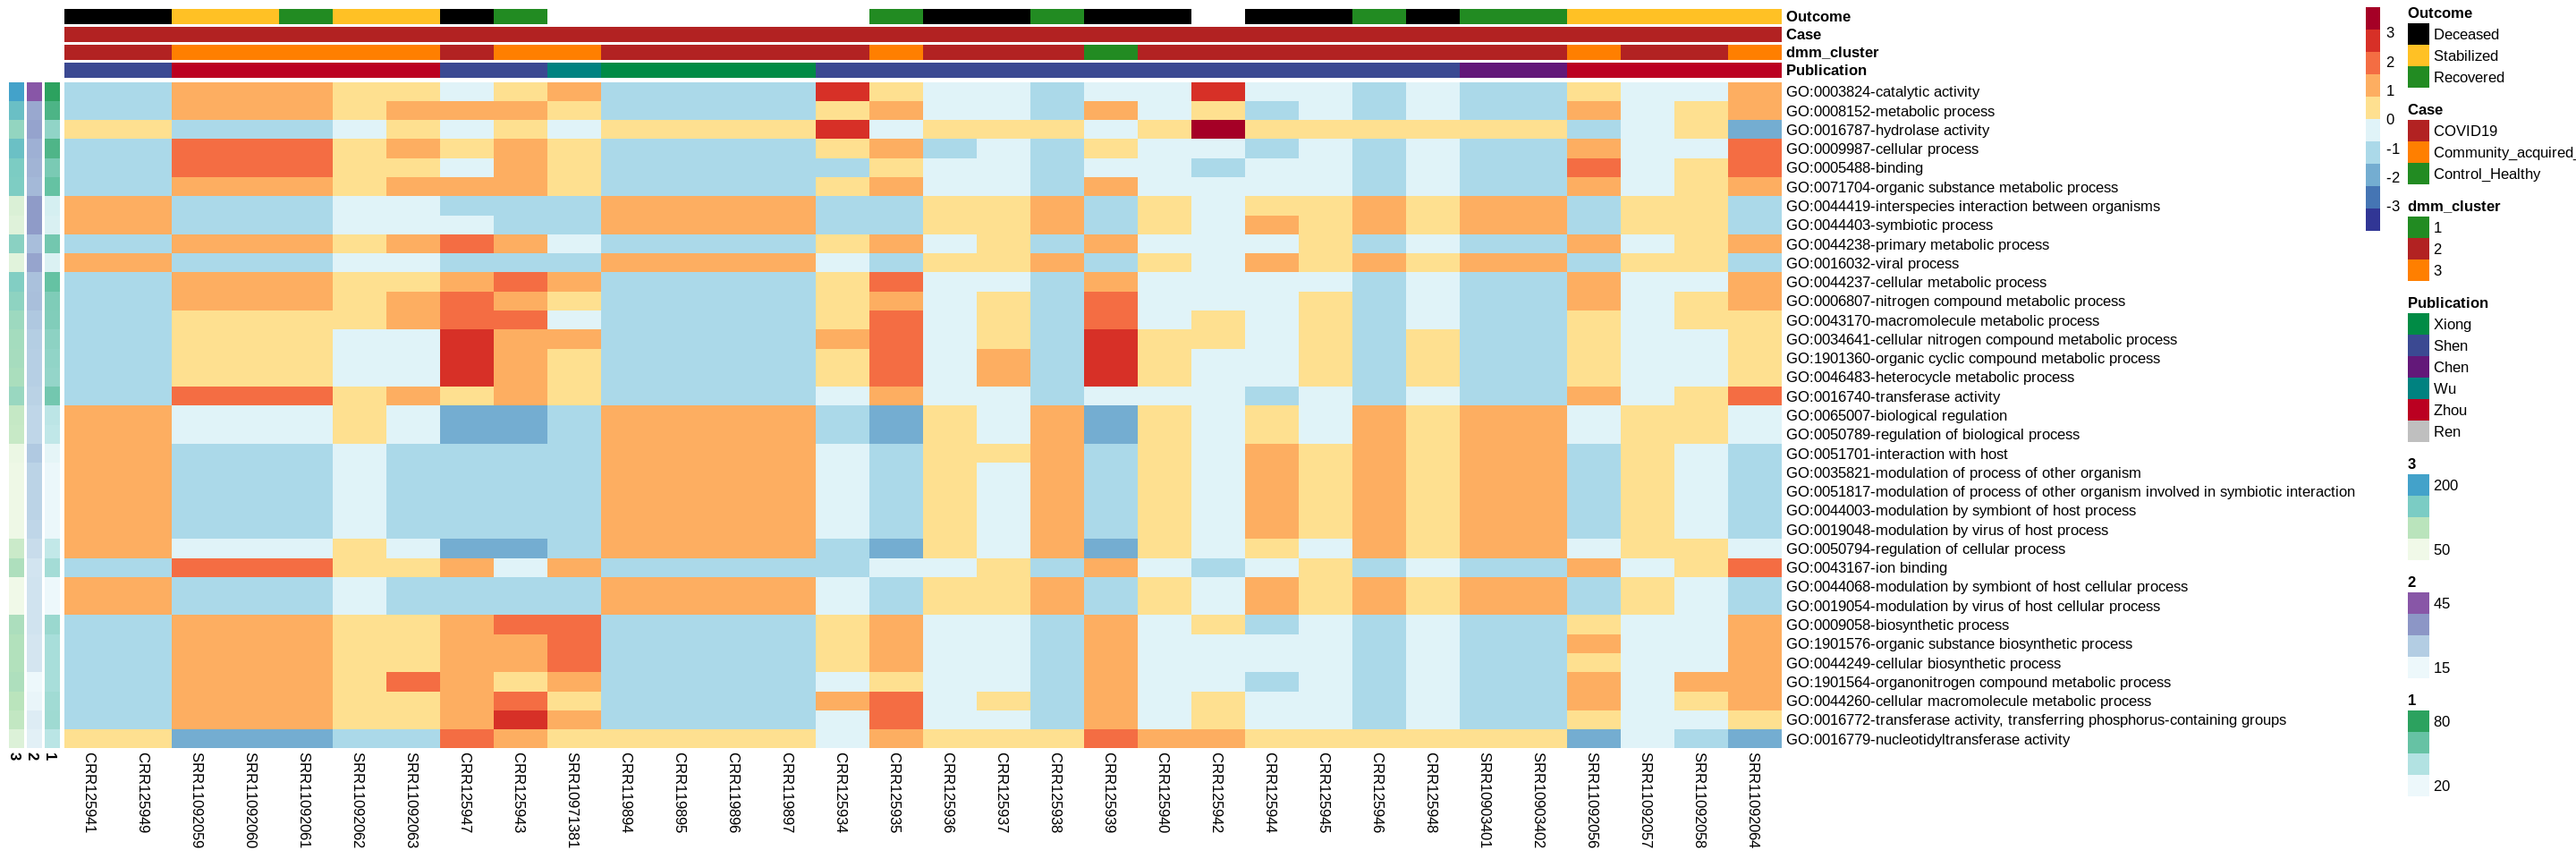

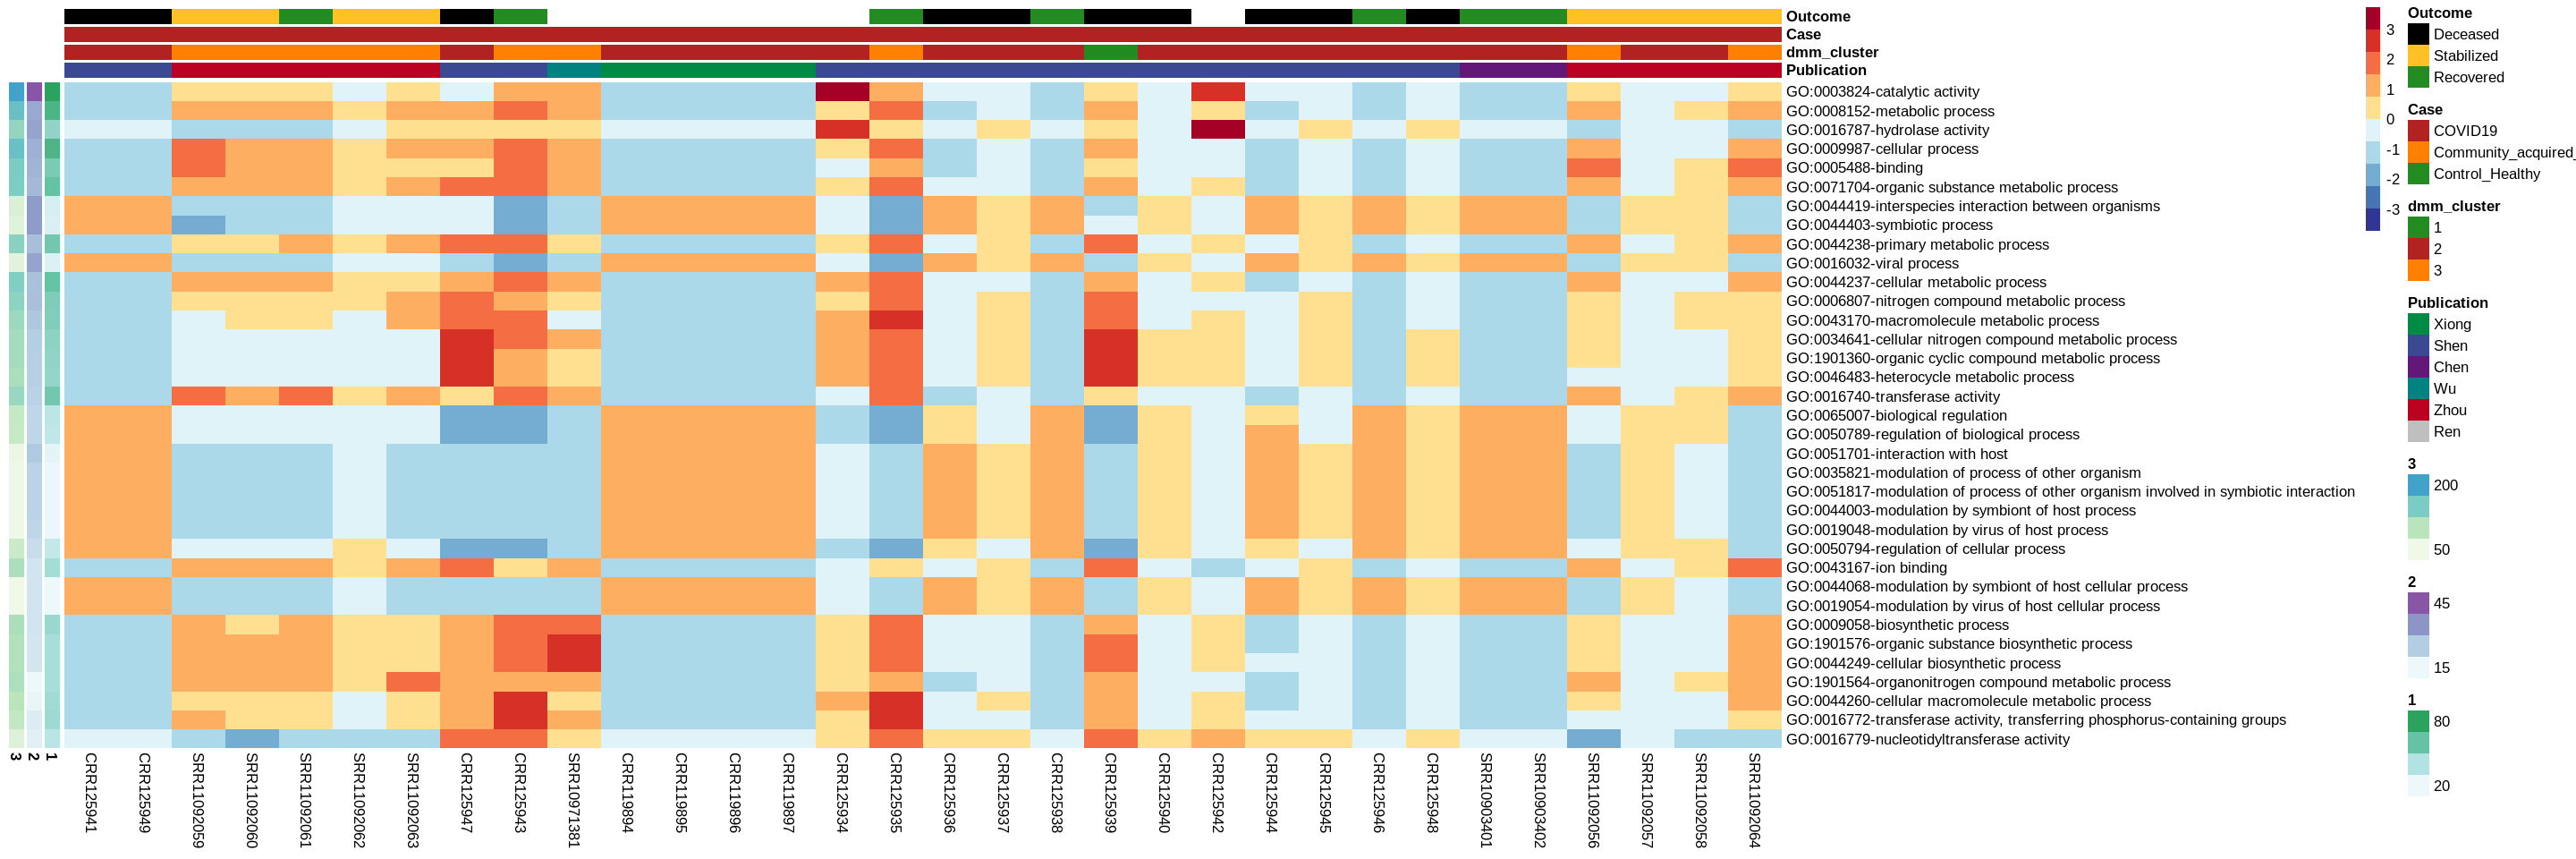

In [1595]:
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               scale="row",
               annotation_colors = ann_colors,
               cluster_row=FALSE,cluster_cols=FALSE,
               #clustering_distance_rows = "euclidean",
               #clustering_distance_cols = "euclidean",
              annotation_row =df_row)
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               scale="row",
               annotation_colors = ann_colors,
               cluster_row=FALSE,cluster_cols=FALSE,
               #clustering_distance_rows = "euclidean",
               #clustering_distance_cols = "euclidean",
              annotation_row = df_row)

zscore transformation make the differences look even more subtle, but there are still slight variances... 

## heat map Ex 3:
 - compositional transformation before and after subessting for Maaslin2 GO Terms
 - distance clustering
 - No color z score scaling

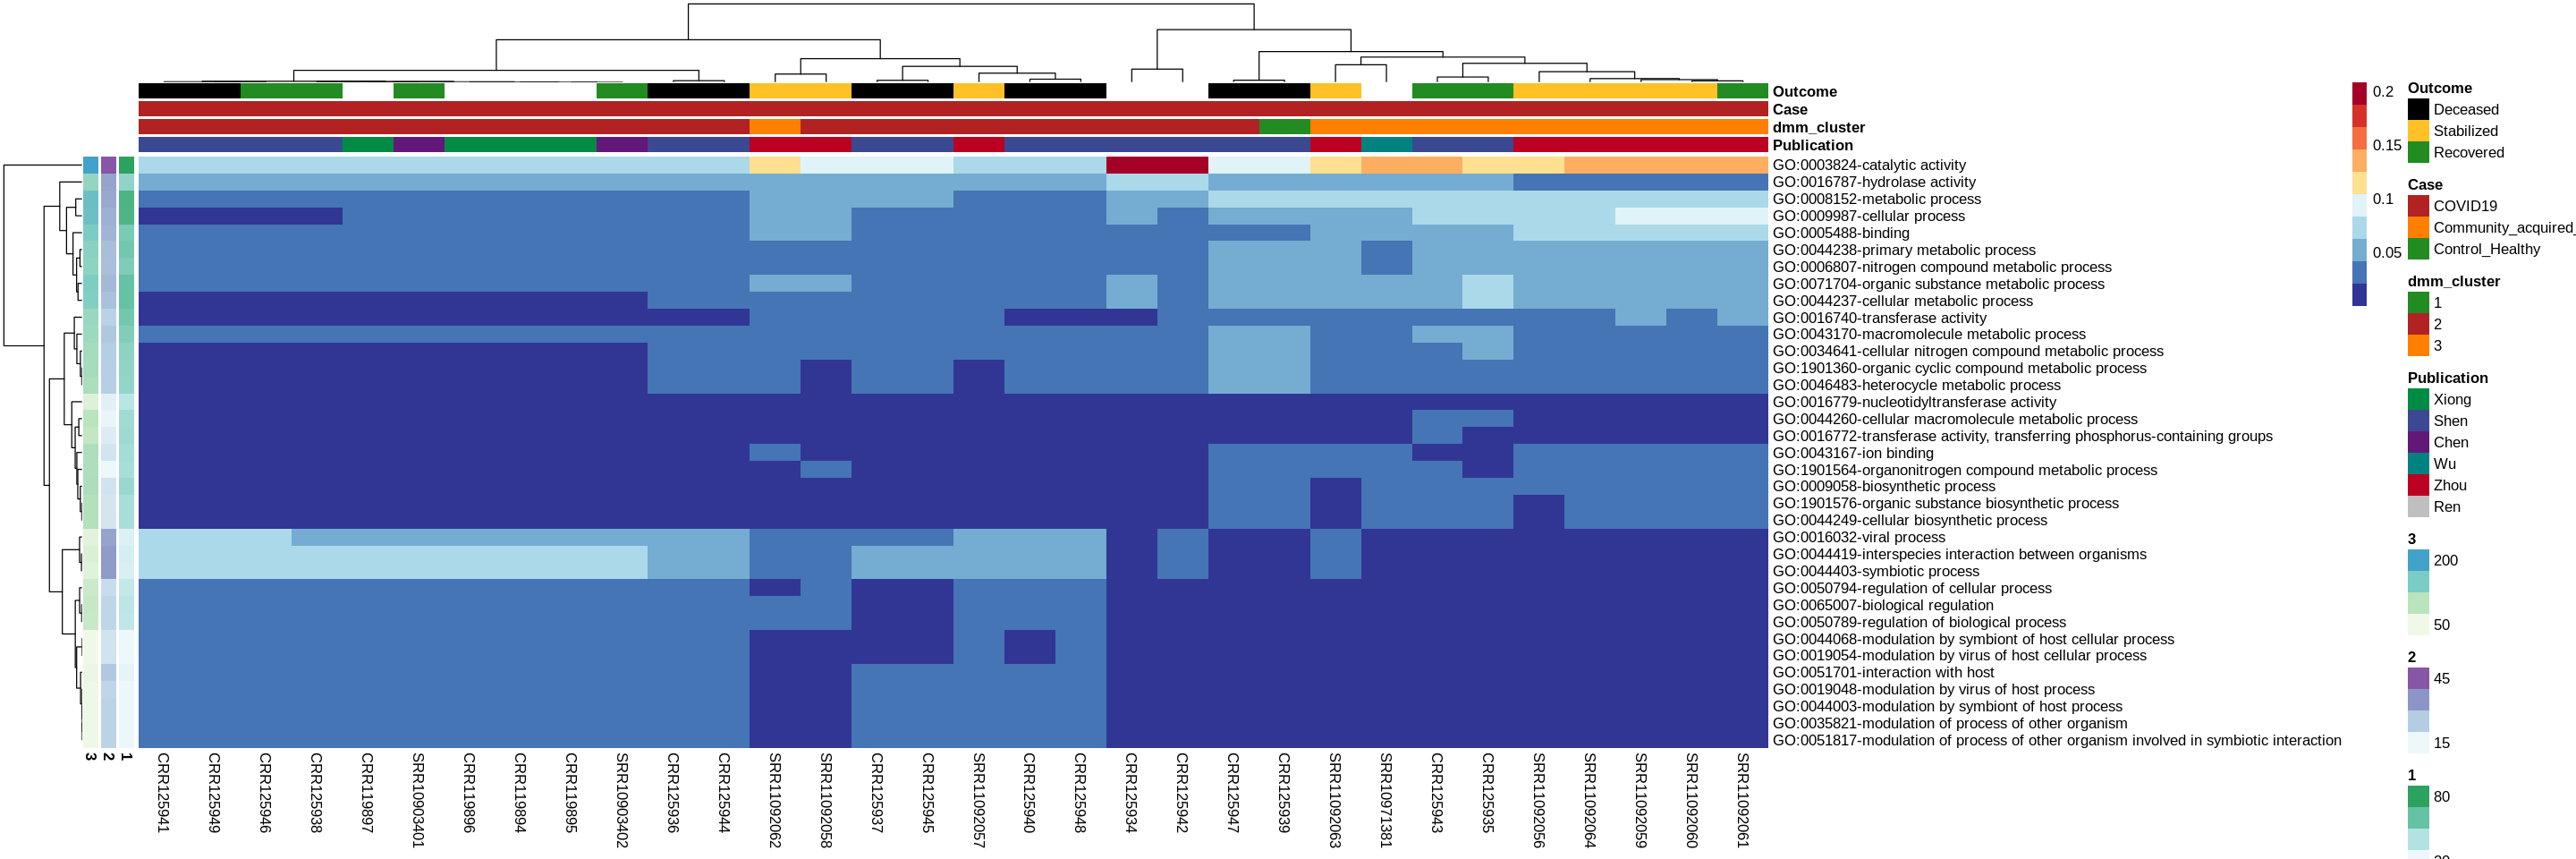

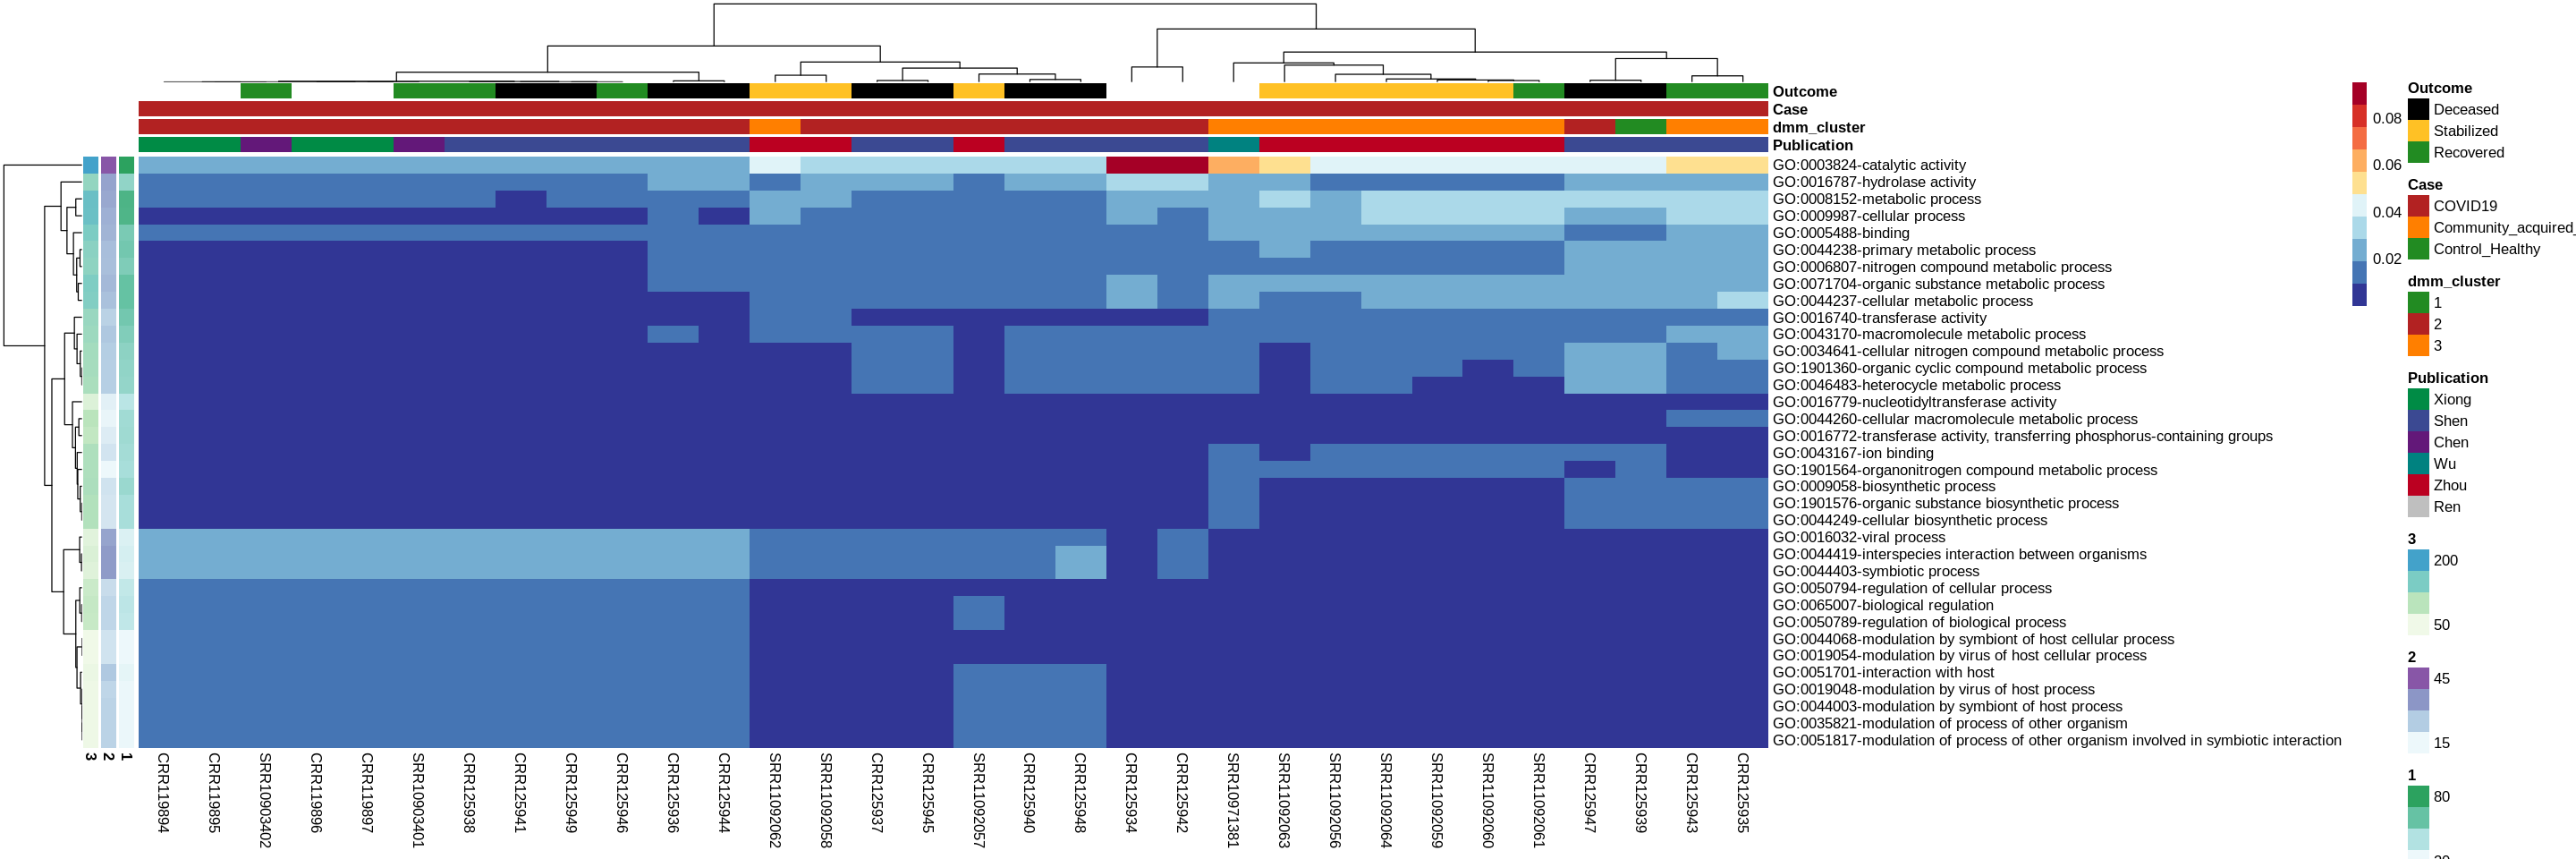

In [1596]:
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row =df_row)
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row = df_row)

it looks the transforming the dataset before the subset yields nicer clustering based on case...

## heat map Ex 4:
 - compositional transformation before and after subsetting for Maaslin2 GO Terms
 - Distance clustering
 - z score scaling

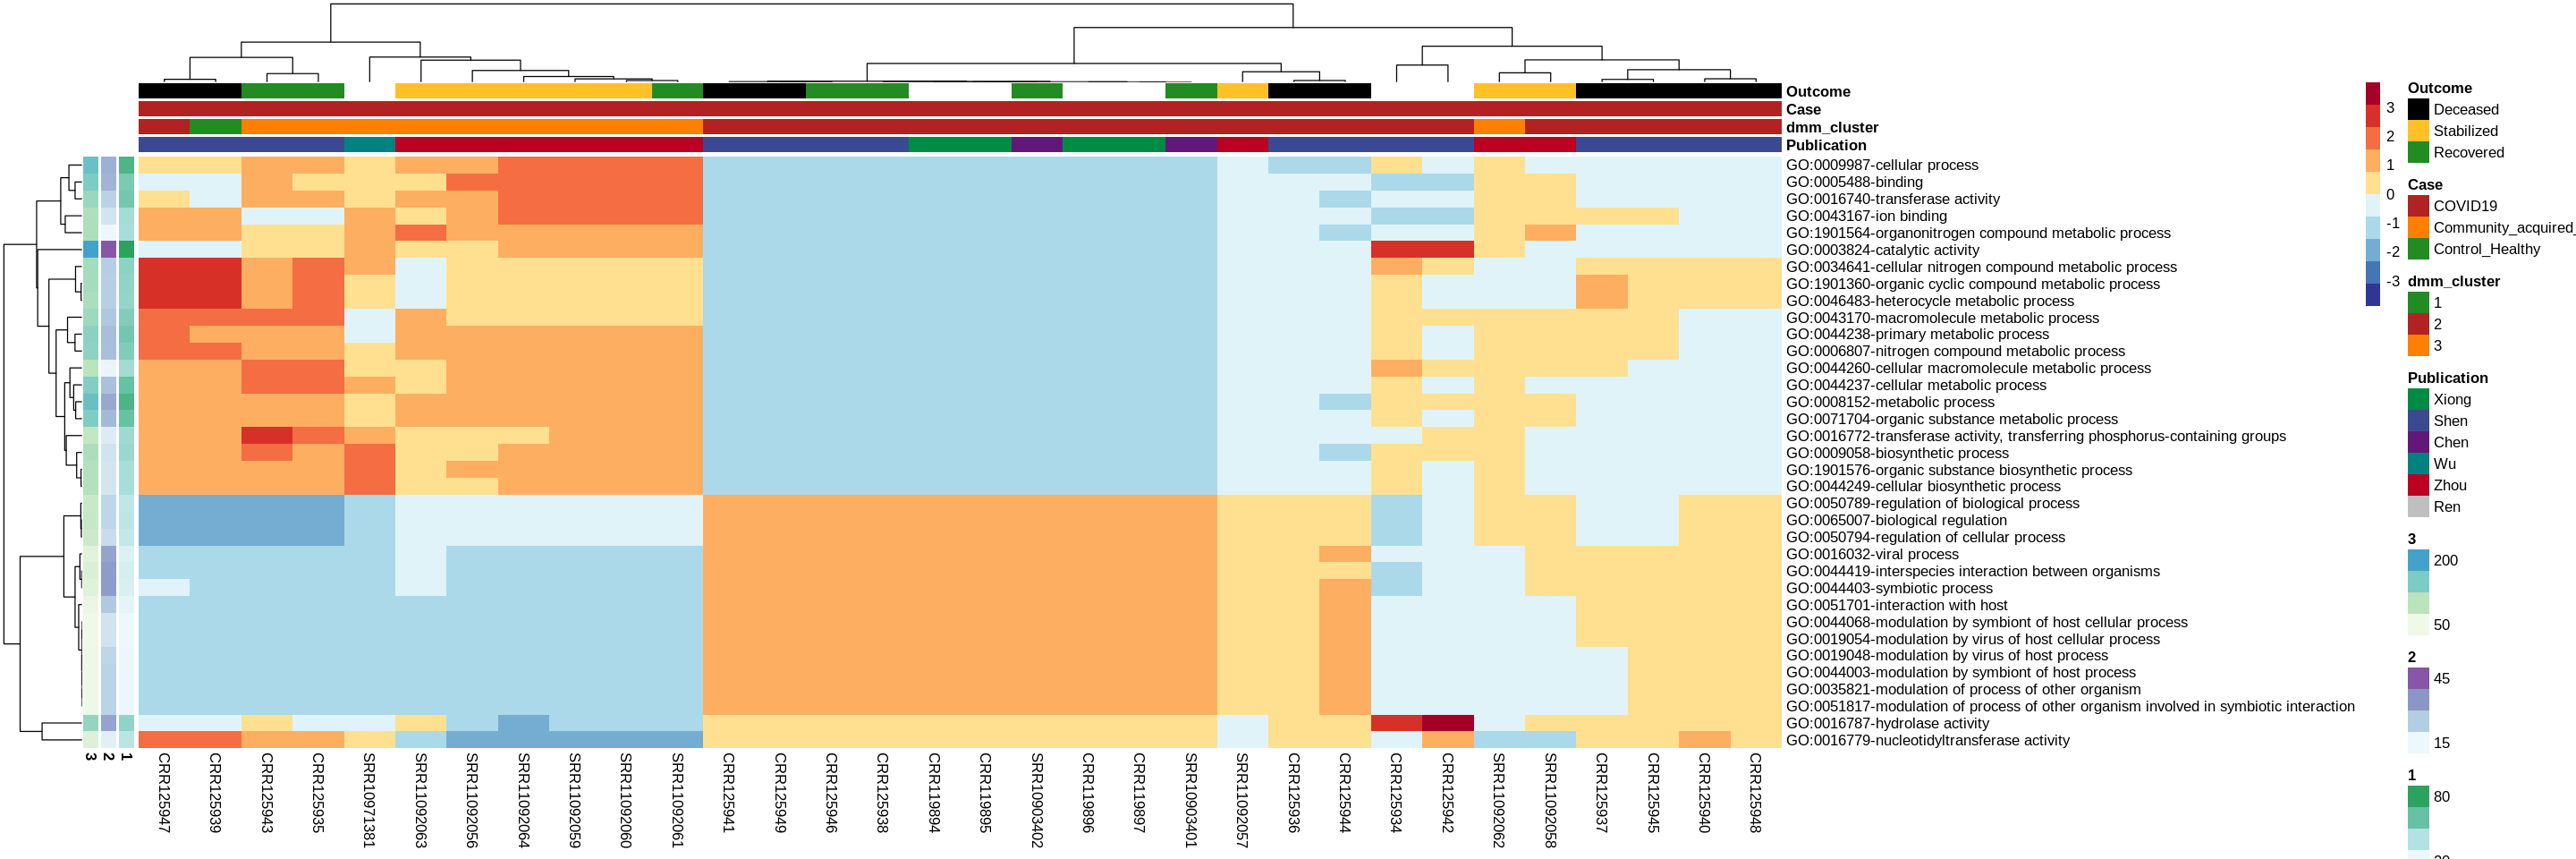

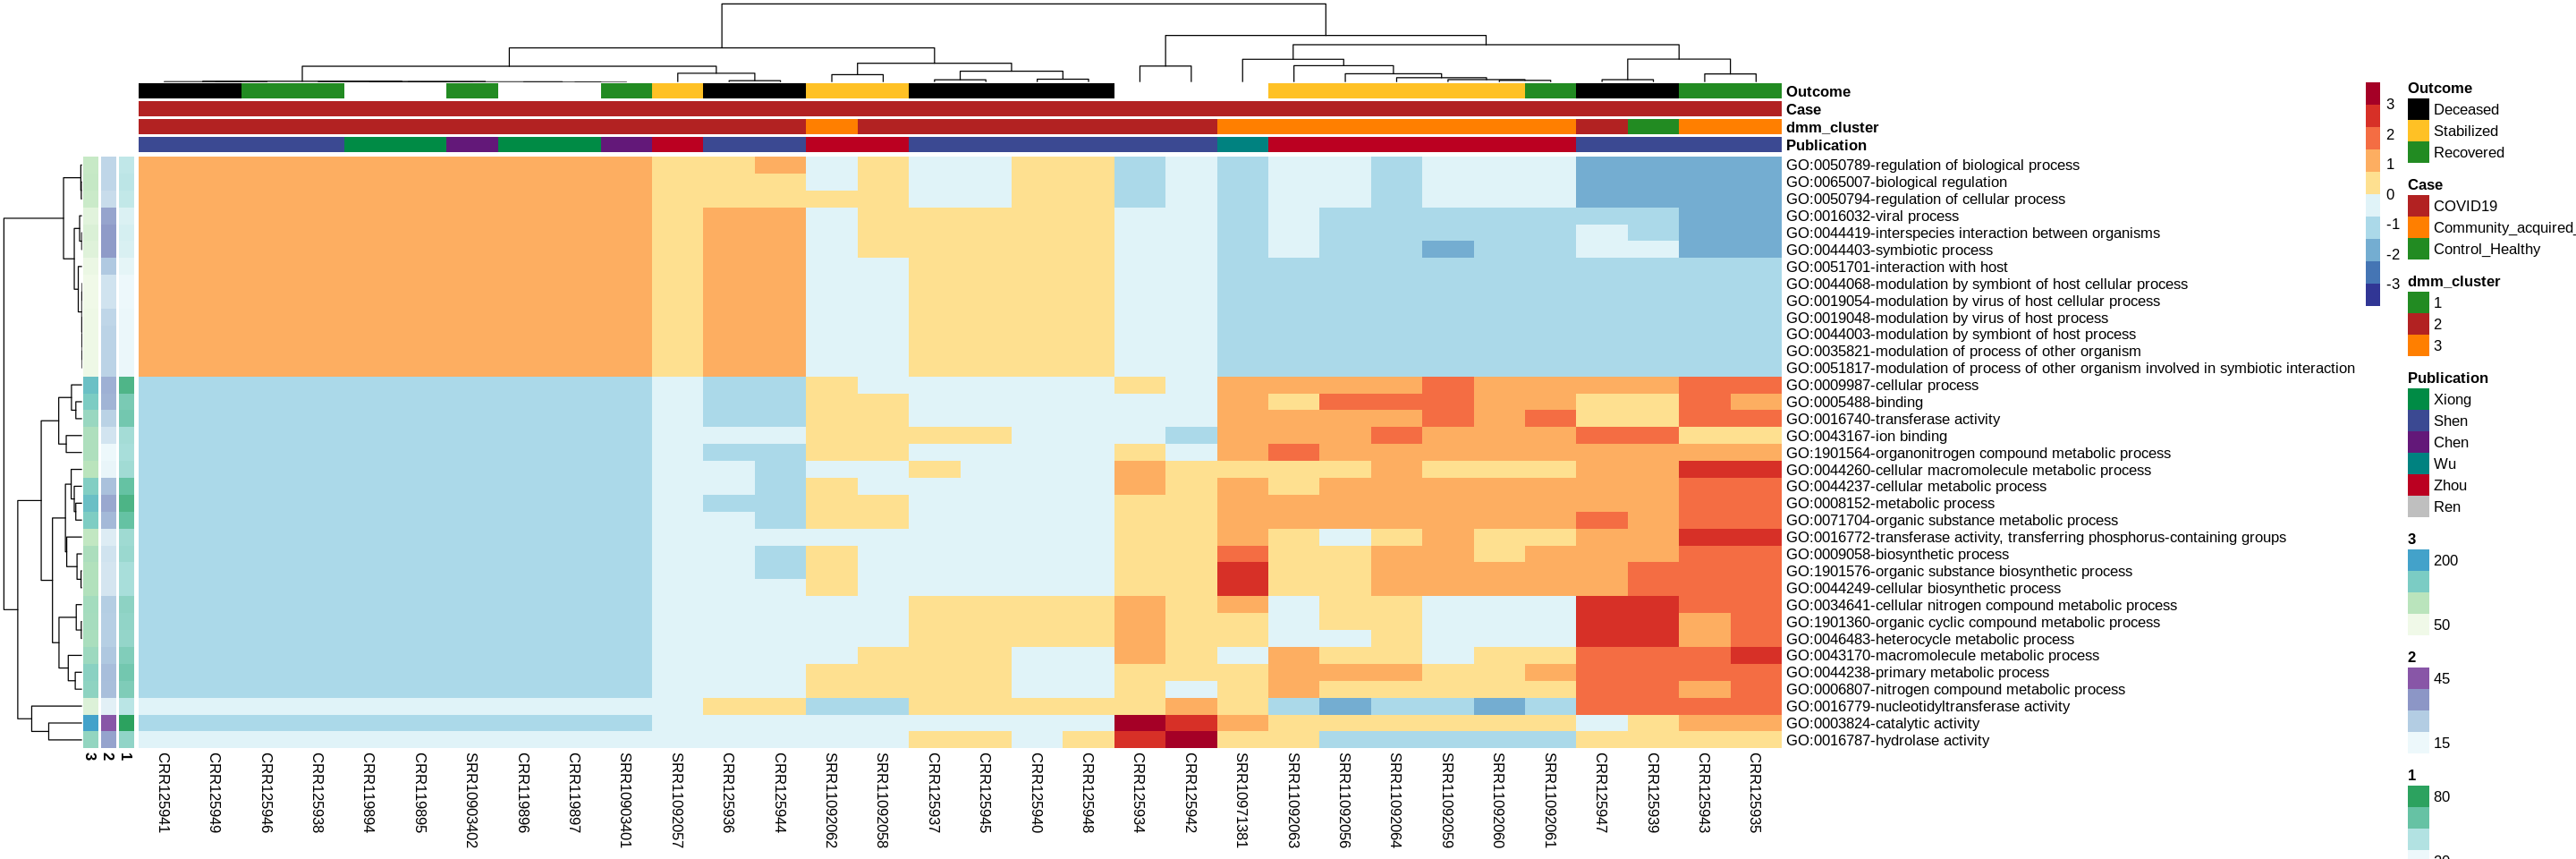

In [1597]:
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
                scale="row",
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row =df_row)
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               scale="row",
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row = df_row)

ok based on these results it looks like I want to use the dataset taht was compositionally transformed before subset, and I'm still on the fence about z-scoring....  \
Let me see if I can make a polished up version
## heat map Ex 5:
 - compositional transformation before and after subsetting for Maaslin2 GO Terms
 - Distance clustering
 - z score scaling
 - gap in col and rows

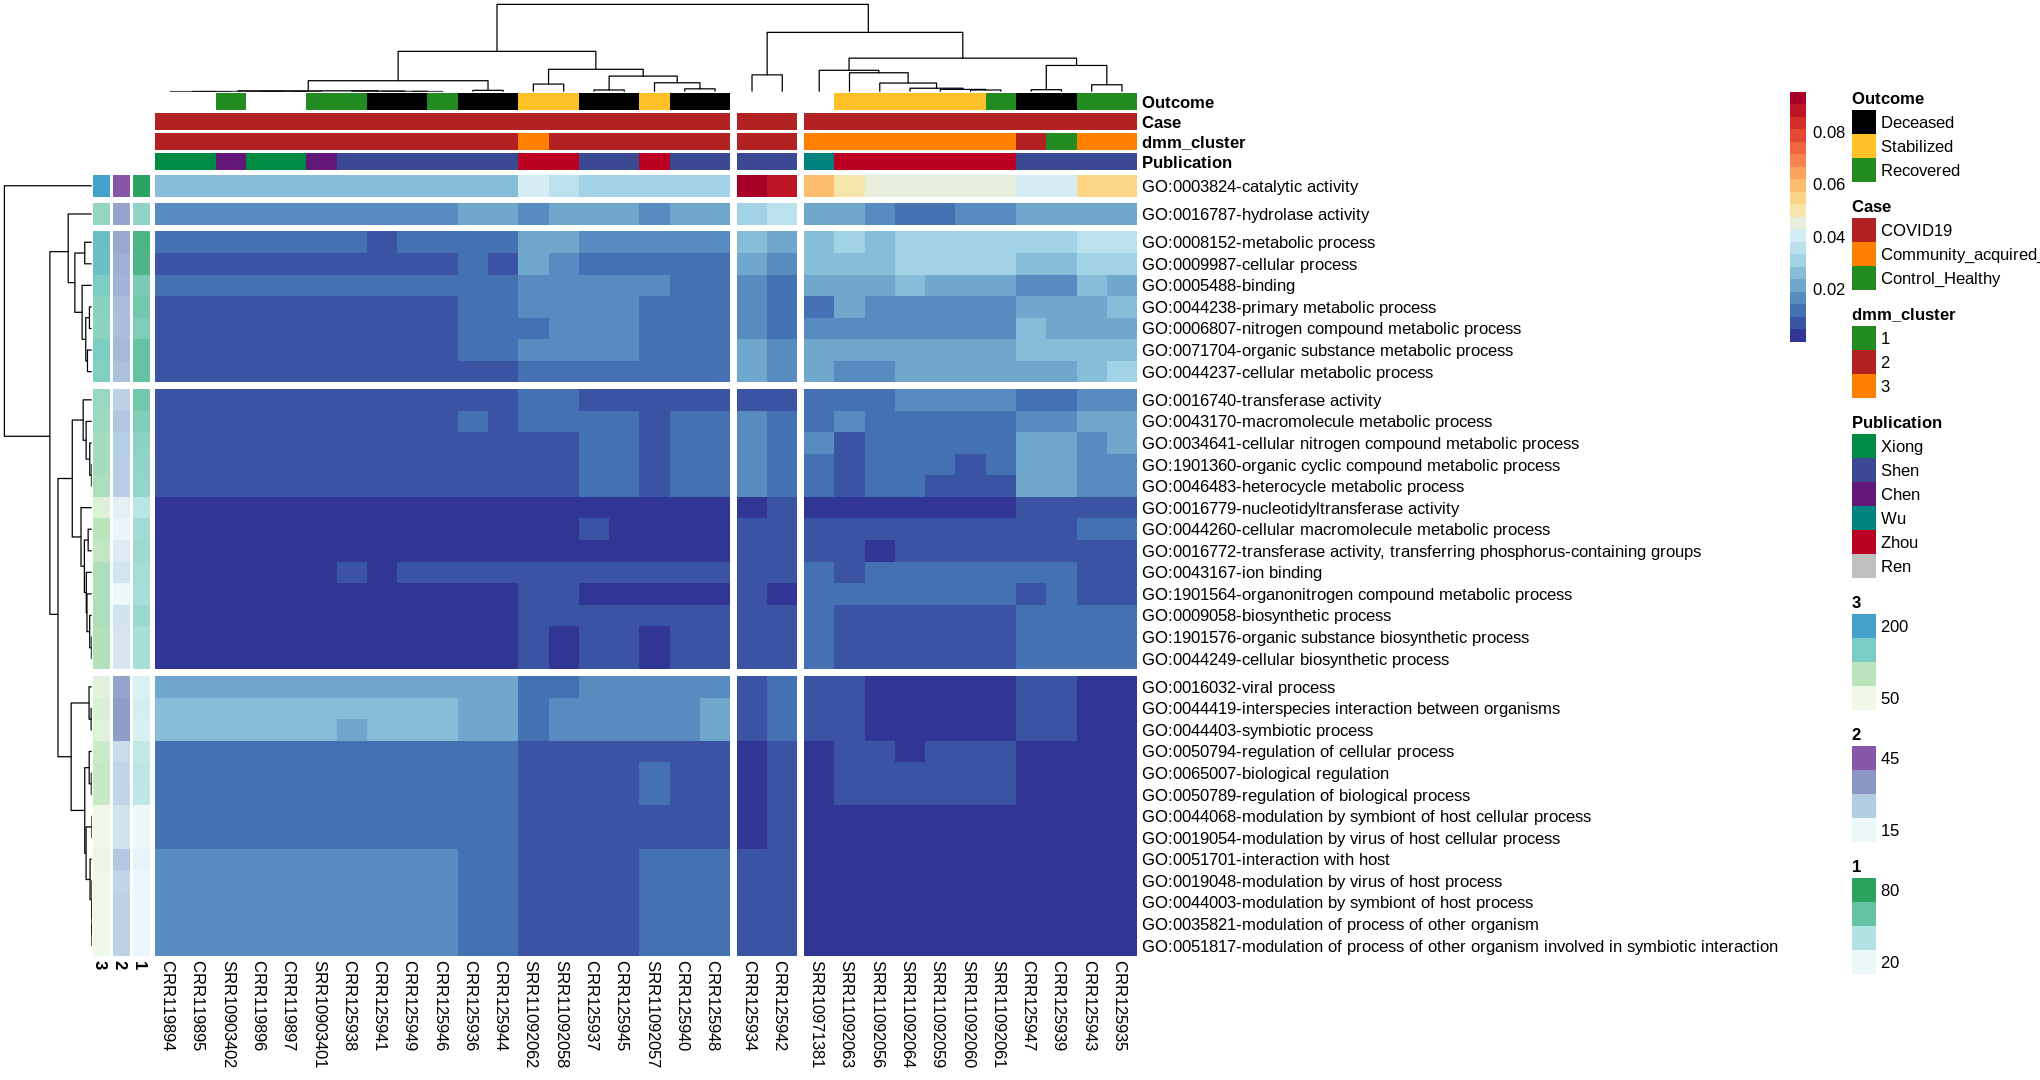

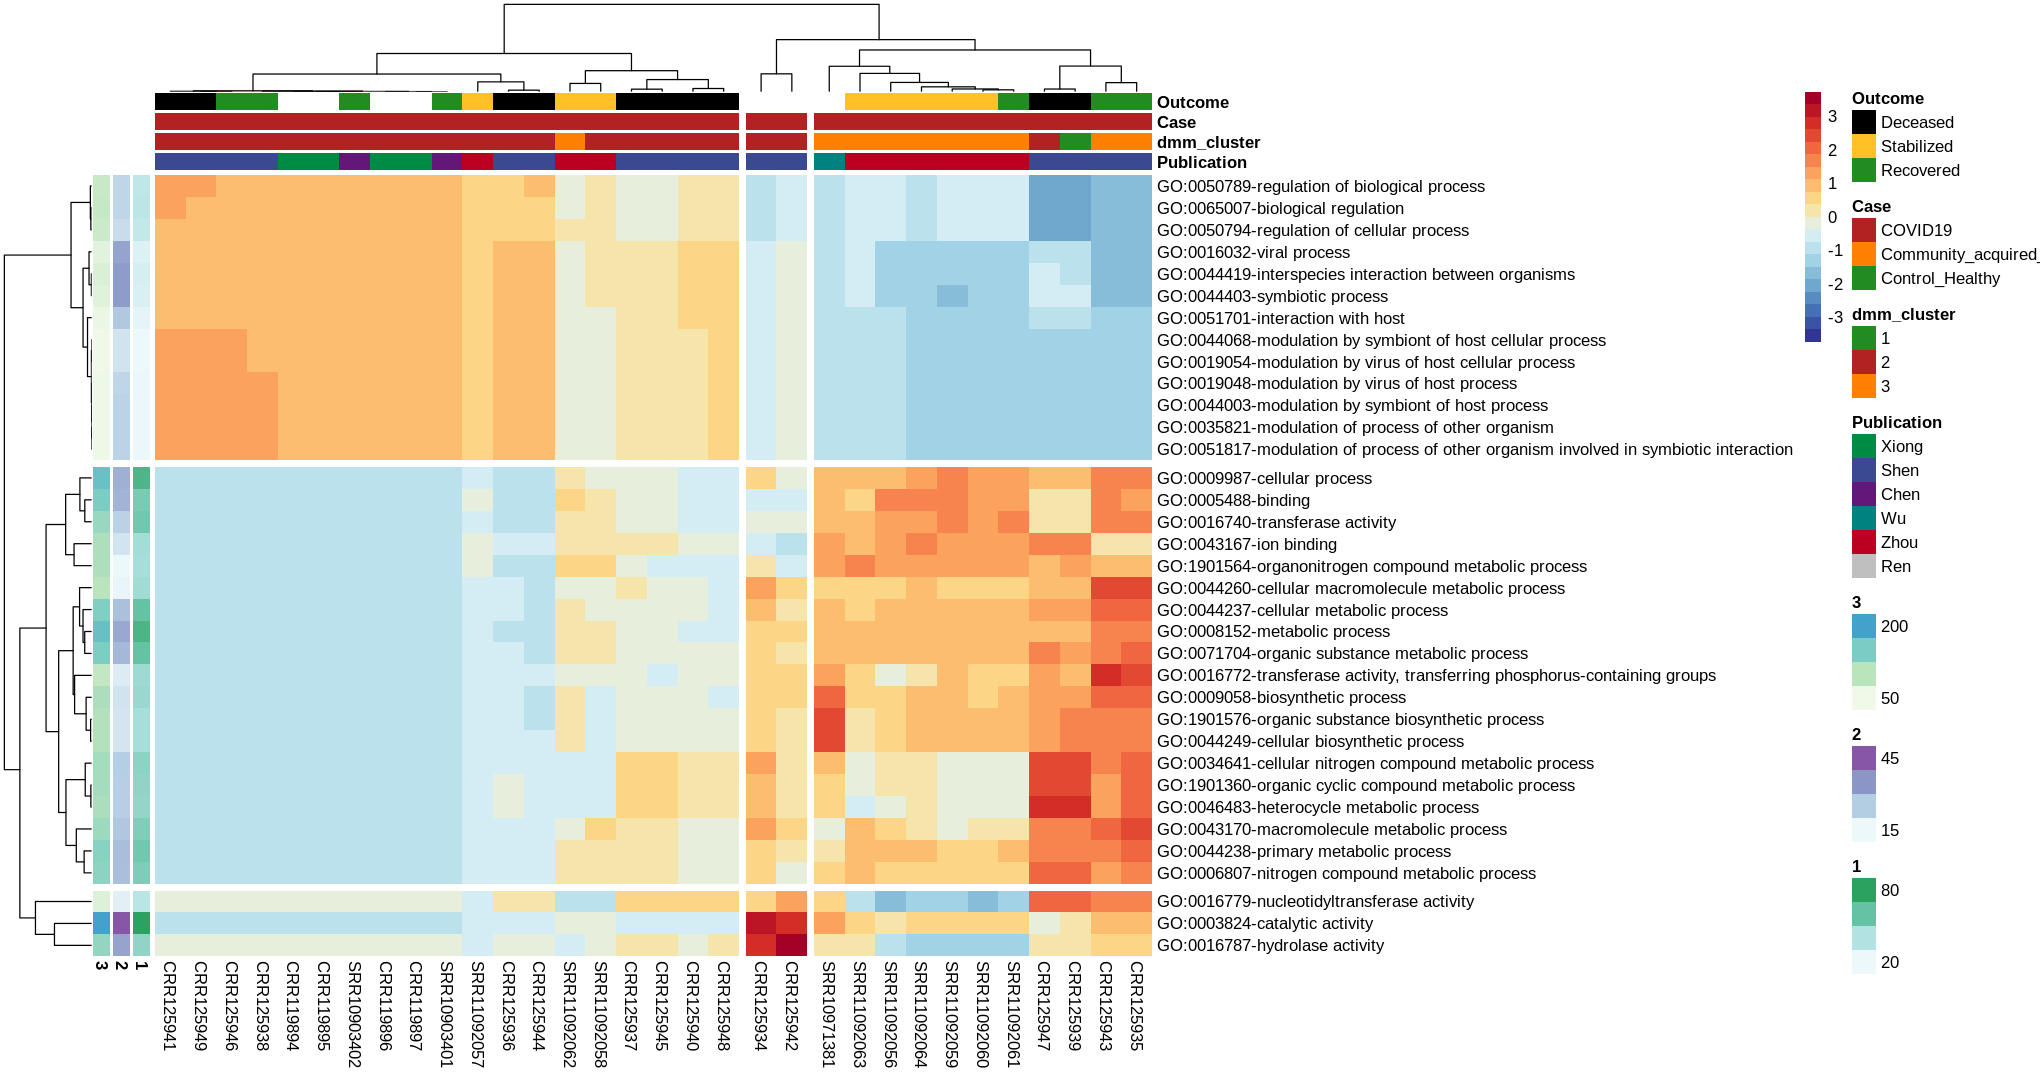

In [1604]:
options(repr.plot.width=17, repr.plot.height=9)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(20),
               annotation_col=df,
               cutree_col = 3,
               cutree_row=5,
               scale="none",
               border_color="NA",
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row = df_row) 

options(repr.plot.width=17, repr.plot.height=9)
xx <- pheatmap(mat = select2b,
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(20),
               annotation_col=df,
               cutree_col = 3,
               cutree_row=3,
               scale="row",
               border_color="NA",
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row = df_row) 

# Everything below her is Original STUFF

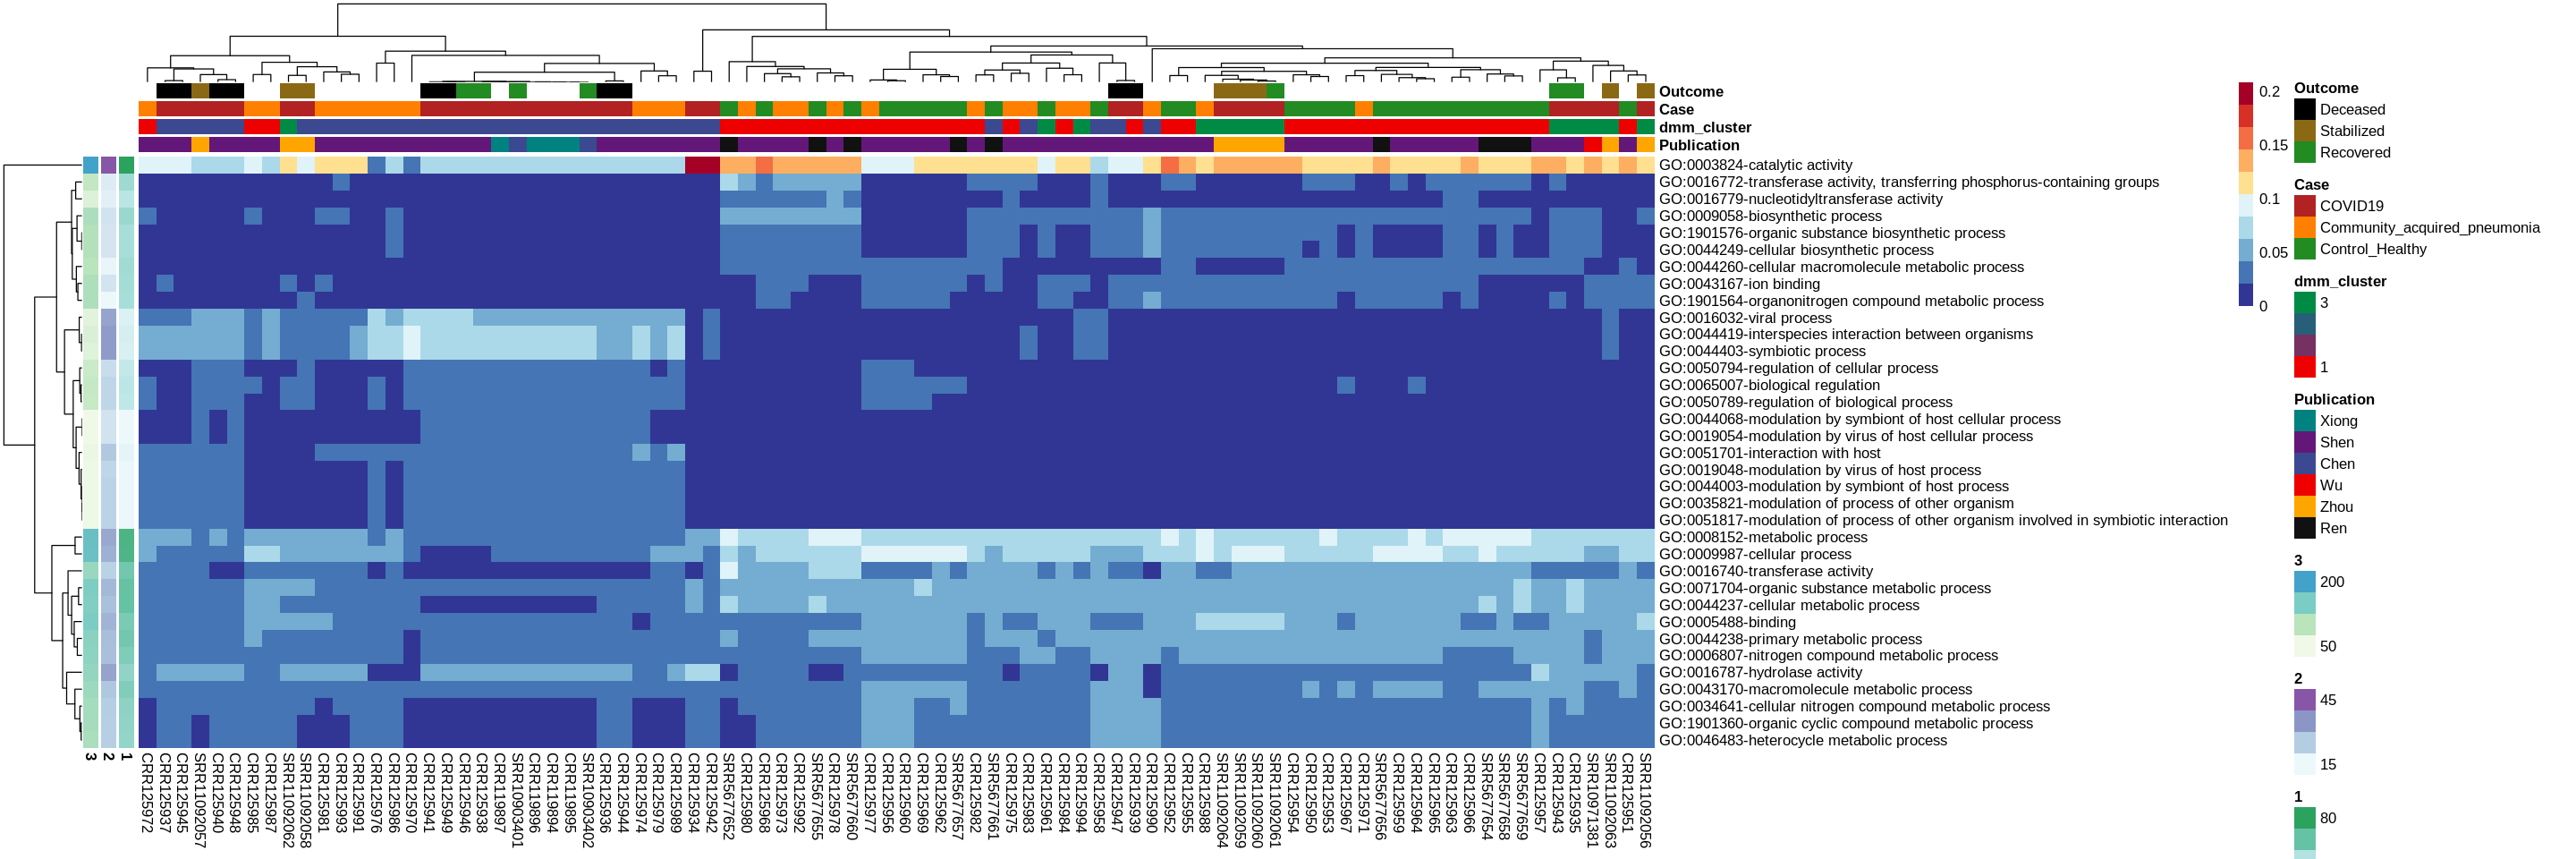

In [1387]:
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,
               color =  colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(10),
               annotation_col=df,
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
               annotation_row = df_row,
               cluster_row = T,
               cluster_col=T)

### Ammendment that removes the publication coloumn

In [1334]:
# Ammendment that removes the publication coloumn
df<-df%>%select(-Publication)

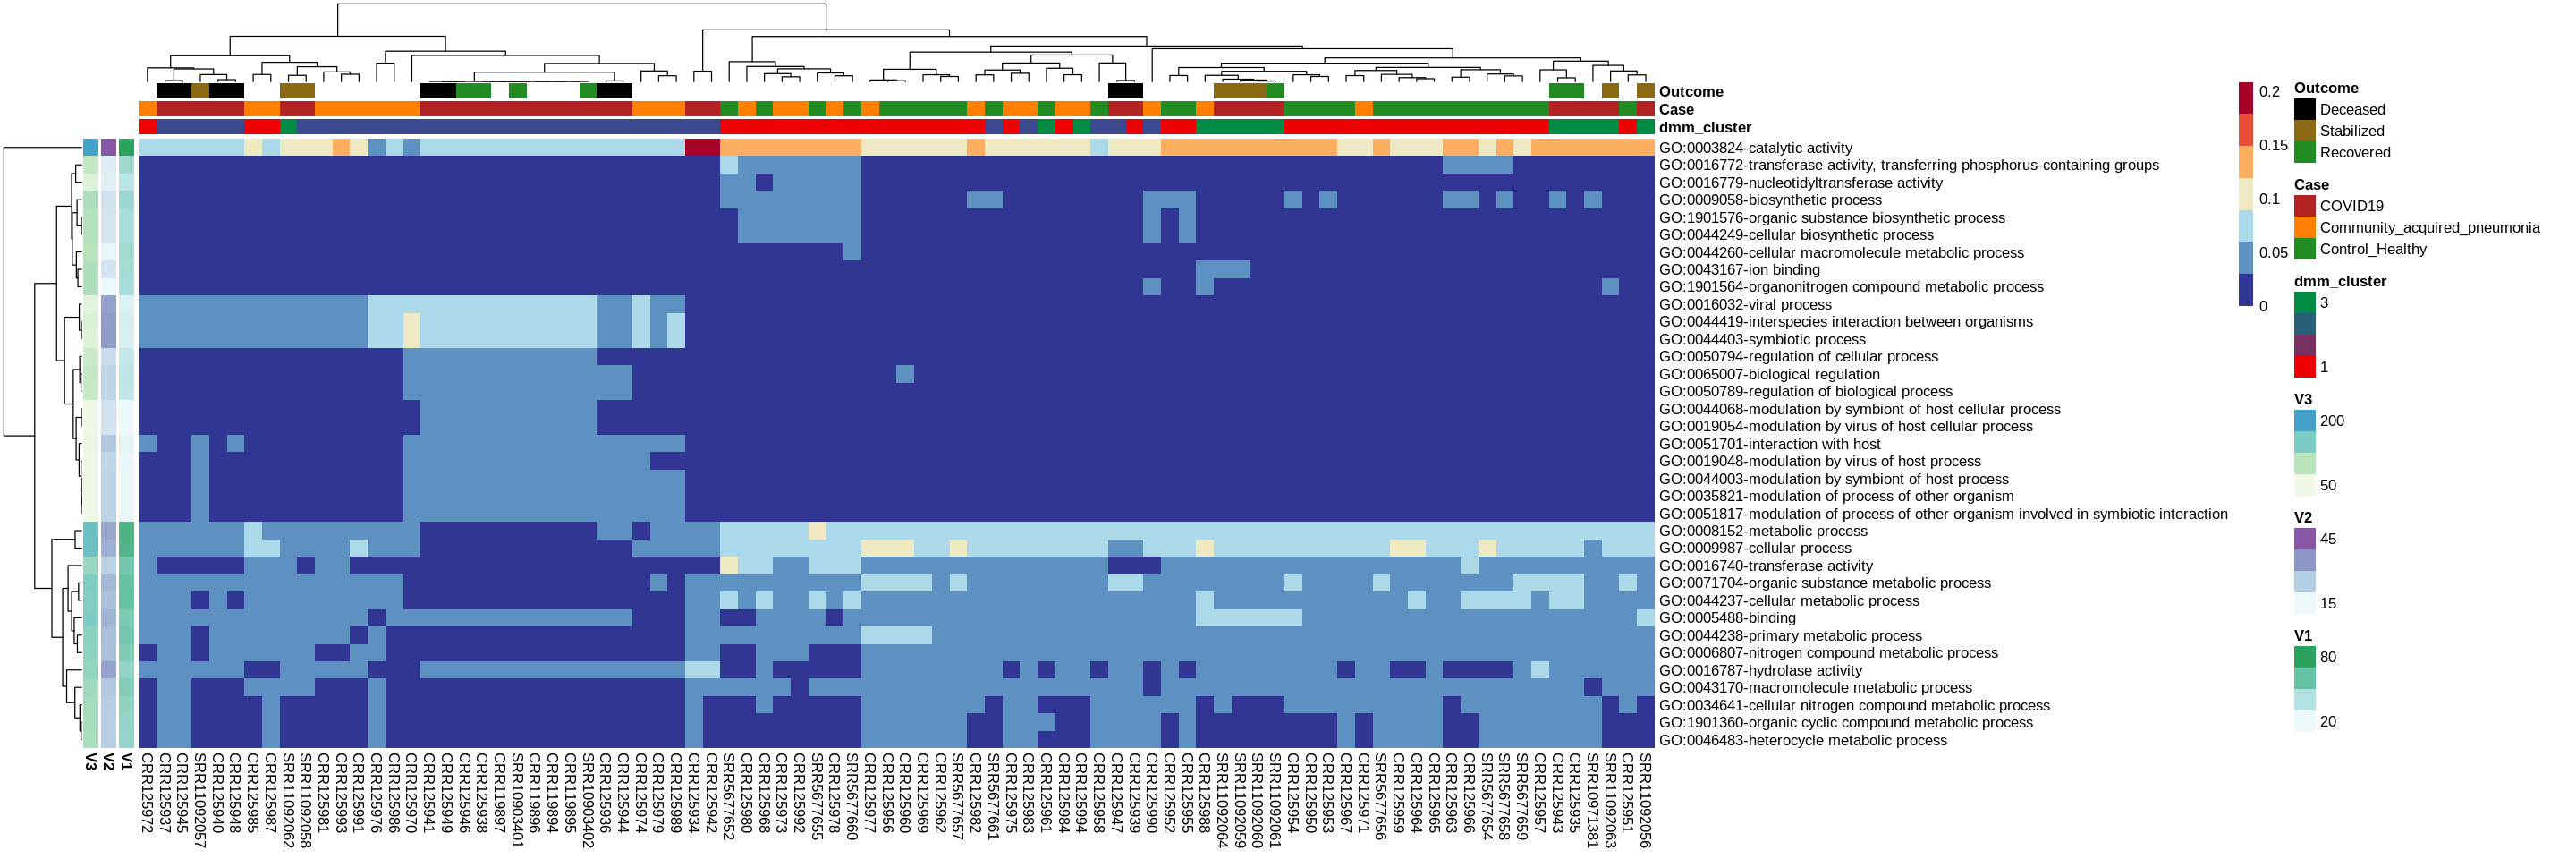

In [1335]:
ann_colors = list(
  dmm_cluster=c("1"="#EE0000FF","2"="#3B4992FF","3"="#008B45FF"),#,"4"="#631879FF"),#,"5"="#008280FF","6"="#BB0021FF","7"="#5F559BFF"),
  Publication=c("Xiong"="#008280FF", "Shen"="#631879FF","Chen"="#3B4992FF","Wu"="#EE0000FF","Zhou"="orange","Ren"="#111111"),
  Case=c("COVID19"="firebrick","Community_acquired_pneumonia"="darkorange1", "Control_Healthy"="forestgreen"),
 # Sample_Type=c("COVID_19"="firebrick","Community_acquired_pneumonia"="darkorange1", "Healthy"="forestgreen"),
Outcome=c("Deceased"="black","Stabilized"="goldenrod4","Recovered"="forestgreen"))
options(repr.plot.width=24, repr.plot.height=8)
xx <- pheatmap(mat = select2,scale="none",
               color = colorRampPalette(rev(brewer.pal(n = 10, name ="RdYlBu")))(7),
               annotation_col=df,
               annotation_colors = ann_colors,
               clustering_distance_rows = "euclidean",
               clustering_distance_cols = "euclidean",
              annotation_row = df_row)

In [1336]:
options(repr.plot.width=5, repr.plot.height=5)
b
res.CA<-CA(a,graph=F)

fviz_ca_biplot(res.CA,
               repel=T,
               col.col="cos2",
               col.row="cos2")

case,dmn,n
<chr>,<chr>,<int>
Community_acquired_pneumonia,1,12
Control_Healthy,1,26
COVID19,1,1
Community_acquired_pneumonia,2,11
Control_Healthy,2,2
COVID19,2,21
Community_acquired_pneumonia,3,2
Control_Healthy,3,1
COVID19,3,10


ERROR: Error in U[, num, drop = FALSE]: incorrect number of dimensions


In [1527]:
a<-tally(case~dmn,meta(term_pseq_prune))

In [1528]:
a

                              dmn
case                            1  2  3
  Community_acquired_pneumonia 12 11  2
  Control_Healthy              26  2  1
  COVID19                       1 21 10

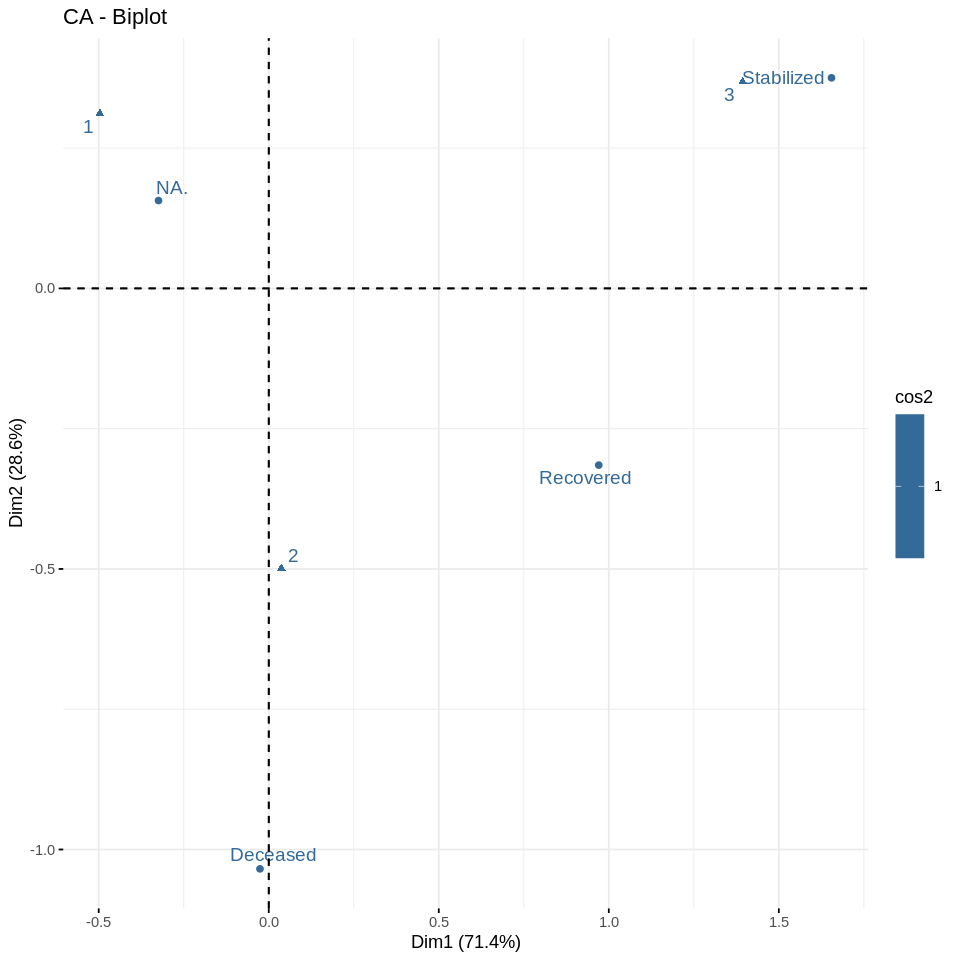

In [347]:
options(repr.plot.width=8, repr.plot.height=8)
a<-tally(~outcome+dmn,meta(term_pseq_prune))
res.CA<-CA(a,graph=F)

fviz_ca_biplot(res.CA,
               repel=T,
               col.col="cos2",
               col.row="cos2")

In [348]:
save.image("./images/3_heatmap.rda")

In [604]:
chisq.test(tally(case=="COVID19"~dmn, meta(term_pseq_prune)))
fisher.test(tally(case=="COVID19"~dmn, meta(term_pseq_prune)))

Warning message in chisq.test(tally(case == "COVID19" ~ dmn, meta(term_pseq_prune))):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  tally(case == "COVID19" ~ dmn, meta(term_pseq_prune))
X-squared = 37.586, df = 2, p-value = 6.892e-09



	Fisher's Exact Test for Count Data

data:  tally(case == "COVID19" ~ dmn, meta(term_pseq_prune))
p-value = 2.005e-10
alternative hypothesis: two.sided


### Chisq. test and factorial anova

In [601]:
chisq.test(b)

ERROR: Error in chisq.test(b): all entries of 'x' must be nonnegative and finite


In [597]:
b<-as_tibble(tally(case~dmn, meta(term_pseq_prune)))
c<-b%>%pivot_wider(names_from = case,values_from=n)
#factorial anova
c
write.table(c,"dmn_vs_case.tsv",sep="\t",row.names = F,quote = F)
ca<-aov(lm(formula = dmn~ case,data = c))

dmn,Community_acquired_pneumonia,Control_Healthy,COVID19
<chr>,<int>,<int>,<int>
1,12,26,1
2,11,2,21
3,2,1,10


In [599]:
(summary(ca))

            Df Sum Sq Mean Sq F value Pr(>F)  
case         1 1.9865  1.9865     147 0.0524 .
Residuals    1 0.0135  0.0135                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1